### Reviewing the tuning parameter for KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
# instantiate the KNN where K = 5
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score.mean())

0.966666666667


In [10]:
# finding the best value of K
K_range = range(1, 31)
scores = []
for K in K_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    scores.append(score)
print(scores)   

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


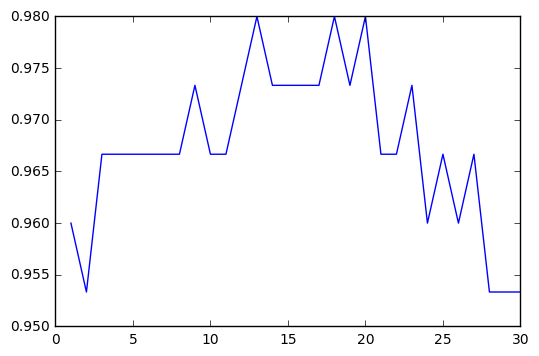

In [12]:
# plotting the scores for each K 
plt.plot(K_range, scores)

### More efficient parameter tuning using GridSearchCV

In [13]:
from sklearn.grid_search import GridSearchCV

In [14]:
k_range = list(range(1, 31))
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [15]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)

In [16]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [17]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [19]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [20]:
grid_scores = [X.mean_validation_score for X in grid.grid_scores_]
grid_scores

[0.95999999999999996,
 0.95333333333333337,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.97333333333333338,
 0.96666666666666667,
 0.96666666666666667,
 0.97333333333333338,
 0.97999999999999998,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.96666666666666667,
 0.96666666666666667,
 0.97333333333333338,
 0.95999999999999996,
 0.96666666666666667,
 0.95999999999999996,
 0.96666666666666667,
 0.95333333333333337,
 0.95333333333333337,
 0.95333333333333337]

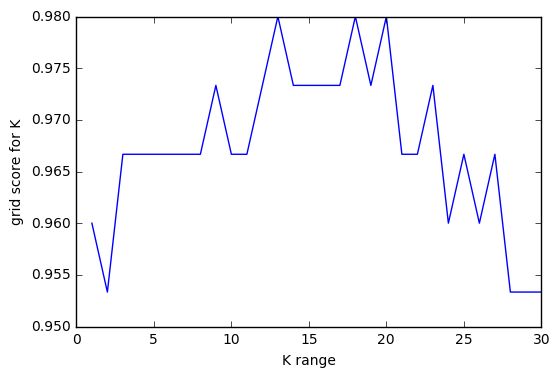

In [23]:
# let's plot grid_scores for each K
plt.plot(K_range, grid_scores)
plt.xlabel("K range")
plt.ylabel("grid score for K")

In [24]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously

In [25]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [26]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [28]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [29]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, para

In [30]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 13}


### Using the best parameters to make predictions

In [31]:
# Using KNN
# we know the best model paramters so, train the model with those values
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [32]:
# predict the value - 
knn.predict([[3, 5, 4, 2]])

array([1])

In [33]:
# grid is already fit with the best values so
grid.predict([[3, 5, 4, 2]])

array([1])

### Reducing computational expense using RandomizedSearchCV

    As we know that, KN and Grid is doing lot of calculations as it need to break and test all the input data to average out the variance. 
    Suppose, if we are using cv = 10
    K = 1 to 30
    weight = 2
    total calc happened is - 10 * 2 * 30 = 600
    which may be cause issue when you dont have much time or resources.
    In these type of case, we se RandomizedSearchCV method, which randomly pick the calc point from all the combination.

In [34]:
from sklearn.grid_search import RandomizedSearchCV

In [35]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [36]:
# n_iter controls the number of searches
# random_state - fix the randomization
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 24},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 20},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 19},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 20}]

In [37]:

# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 20}


In [43]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
prediction = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
    pred = rand.predict([[3, 5, 4, 2]])
    prediction.append(pred)
print(best_scores)
print(prediction)

[0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97299999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998]
[array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1])]


In [45]:
print(list(zip(best_scores, prediction)))

[(0.97999999999999998, array([1])), (0.97299999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97299999999999998, array([1])), (0.97299999999999998, array([1])), (0.97999999999999998, array([1])), (0.97299999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97299999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1])), (0.97299999999999998, array([1])), (0.97999999999999998, array([1])), (0.97999999999999998, array([1]))]
